# Differential calculus

Import of the necessary libraries

In [1]:
import numpy as np
from sympy import * # Calculus Library
from sympy.plotting import plot as symplot # Library for plots
from sympy.abc import x, y, h # Load a symbolic "x"
from sympy.plotting.pygletplot import PygletPlot as Plot # Library for plots

## Límites en Python

El concepto de límite es la base del Cálculo Diferencial.

Recordad que:

$f'(x)=\lim\limits_{h \to 0} \frac{f(x+h)-f(x)}{h}$

Podemos calcular límites en Python utilizando la expresión ```limit(funcion, variable, punto, lateral)``` proporcionada por la librería Sympy.

## Limits in Python

The concept of limit is the basis of Differential Calculus.

Remember that:

$f'(x)=\lim\limits_{h \to 0} \frac{f(x+h)-f(x)}{h}$

We can calculate limits in Python using the expression ```limit(function, variable, point, side)``` provided by the Sympy library.

In [3]:
# Example
# x = symbols('x')
limit(sin(x)/x, x, 0)
limit(1/x, x, 0, '+')
limit(x**2, x, 0, '-')

0

In [4]:
limit((cos(x + h) - cos(x))/h, h, 0) # Calculation of the derivative from its definition

-sin(x)

In this case, the limit is calculated when h tends to zero.

## Derivate

#### Derivative calculation
To calculate the derivative without using its definition, ```diff("function")``` will be used.

Example:

In [5]:
diff(cos(x)) # Calculates the derivative that coincides with the one obtained from its definition

-sin(x)

In [6]:
d1 = diff(x**2, x) # Calculates the derivative of an expression
d1

2*x

In [7]:
d1 = (x**2).diff(x) # Another syntax to calculate the derivative
d1

2*x

In [8]:
d2 = Derivative(x**2,x) # Mathematical expression of the derivative
d2

Derivative(x**2, x)

In [9]:
d2.doit() # Calculate the derivative from its mathematical expression

2*x

#### Graphic representation

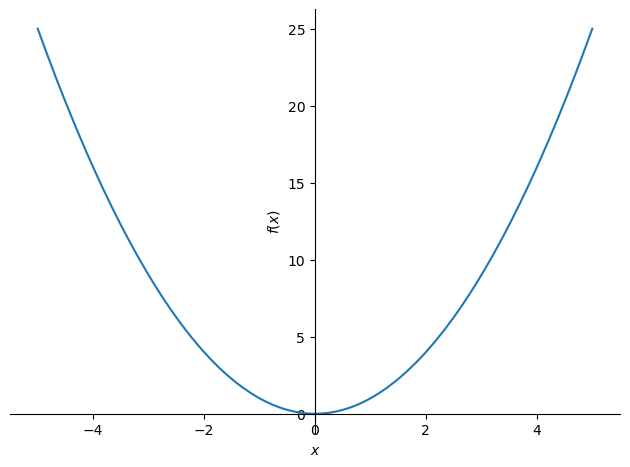

In [10]:
p = symplot(x**2,(x, -5, 5)) # Graphical representation of a mathematical function

Representación gráfica de dos curvas en el mismo gráfico

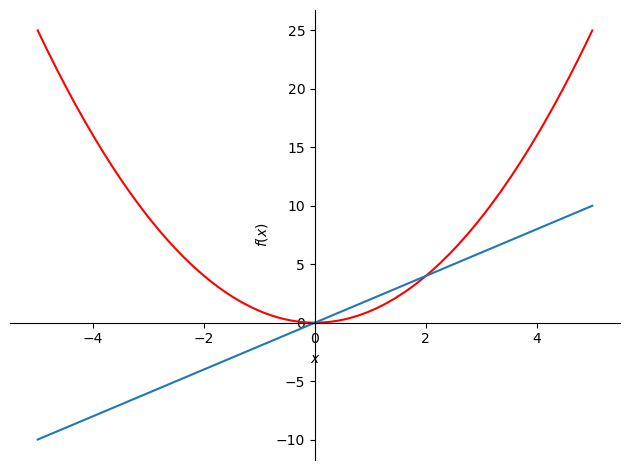

In [11]:
p = symplot(x**2,d1,(x, -5, 5),show=False) # The graph is created with the two functions, the representation range and the direct representation functionality is disabled
p[0].line_color = 'red' # Change the color of the first graph
p.show() # Show the graph

#### Replacement
When functions are defined symbolically, it is possible to calculate the value of said function for a given value of _x_ as follows:

In [12]:
d1.evalf(subs={x:10})

20.0000000000000

o

In [13]:
d1.subs(x,10)

20

### Partial Derivatives

In [14]:
g = x**2 + y**3

In [15]:
diff(g,x) # First partial derivative with respect to x

2*x

In [16]:
diff(g,y) # First partial derivative with respect to y

3*y**2

In [17]:
# Second partial derivative with respect to x
diff(g,x,2) # or diff(g,x,x)

2

In [18]:
diff(g,y,y) # Second partial derivative with respect to y

6*y

## Function analysis

### Definition of a function

In [19]:
num = 2 * (x**2 - 9)
den = (x**2 - 4)

In [20]:
f = num / den
f

(2*x**2 - 18)/(x**2 - 4)

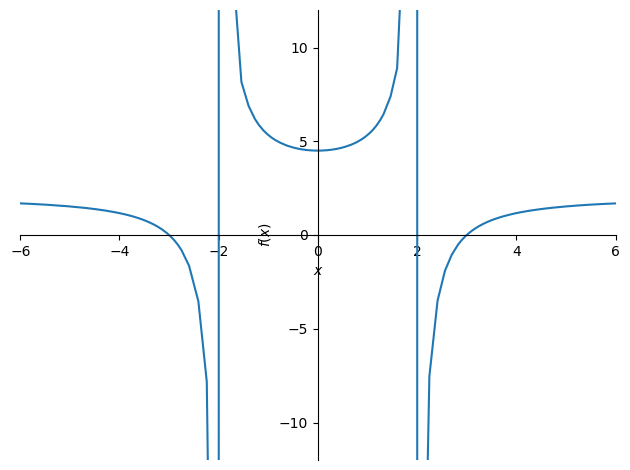

In [21]:
p = symplot(f, xlim=(-6,6), ylim=(-12,12)) 

### Horizontal Asymptotes

In [22]:
limit(f,x,oo) # oo represents infinity

2

### Vertical Asymptotes


The denominator is set equal to zero and the roots are stored in a variable.

In [23]:
r = solve(den, x)
r

[-2, 2]

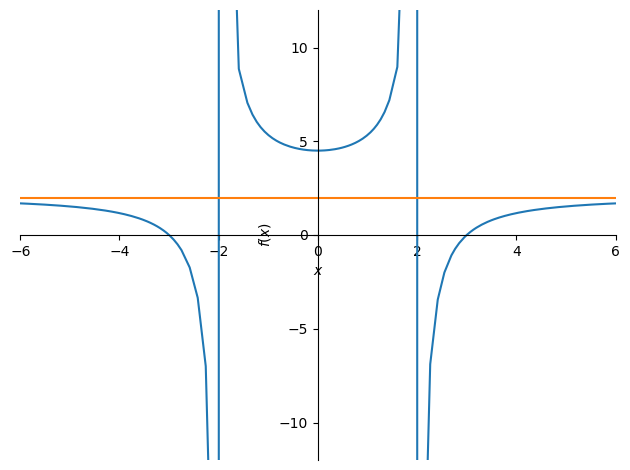

In [24]:
# Graph with the horizontal asymptote
p = symplot(f,2, xlim=(-6,6), ylim=(-12,12),show=false)
p.show()

### Critical points

We calculate the first derivative and set it equal to zero.

In [25]:
f1 = diff(f)
f1

4*x/(x**2 - 4) - 2*x*(2*x**2 - 18)/(x**2 - 4)**2

In [26]:
criticosX = list(solveset(f1, x))
criticosX

[0]

So, in this example, we have a single critical point at x = 0

In [27]:
criticosY = [f.subs(x, a) for a in criticosX]
criticosY

[9/2]

To see if it is a maximum or a minimum, the sign of the second derivative will be analyzed.


### Second derivative

In [28]:
f2 = diff (f, x, 2) # We calculate the second derivative
f2

4*(-4*x**2/(x**2 - 4) + (x**2 - 9)*(4*x**2/(x**2 - 4) - 1)/(x**2 - 4) + 1)/(x**2 - 4)

### We substitute the critical points in the second derivative

In [29]:
segderiv = [f2.subs(x, cr) for cr in criticosX]
segderiv

[5/4]

It is positive, so there is a relative minimum at x = 0

The critical points are now represented

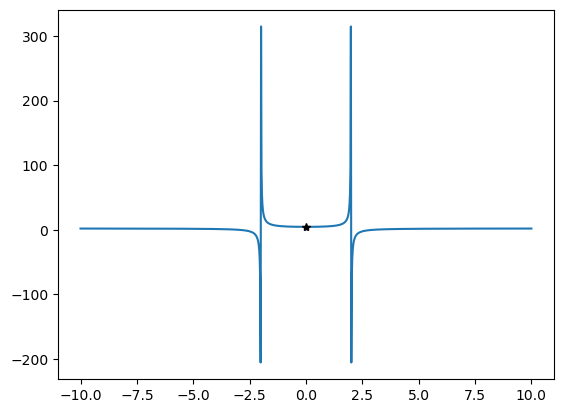

In [30]:
import matplotlib.pyplot as plt
xx = np.linspace(-10, 10, 1000)
yy = lambdify(x, f)(xx)
plt.plot(xx, yy)
plt.plot(criticosX, criticosY, 'k*')
plt.show()

## Optimization

To solve an optimization problem, the following steps are normally followed:

* Identify the problem variables
* Find the function to optimize and, in the case of two variables (x,y), replace ```y = f(x)```
* Reduce the function to a single independent variable
* Check the admission domain of the solutions and discard the absurd ones
* Calculate the maximum or minimum of the objective function according to the requirements of the problem

**Example:**

We want to build a box whose length is three times its width.
The material used to build the top and base costs 10 euros per square meter, while the material used to build the sides costs 6 euros per square meter.
If the box must have a volume of 50 cubic meters, determine the dimensions that minimize the cost of building the box.

In [32]:
# We make a drawing of the problem
#    +--------+
#   /        /|
#  /        / |  height
# +--------+  |
# |        |  |
# |        |  +
# |        | /
# |        |/  length
# +--------+
#   width -> x

In [33]:
# We want to build a box whose length is three times its width.
width = x;
length = 3*width;

In [38]:
# If the box has to have a volume of 50 cubic meters
#Volume = width *length* height
#50 = width *length* height -> height = 50/(width *length)
height = 50/(width*length)
lid = length*width
base = length*width
Cost1 = (lid+base)*10
side1 = width*height # the side of the forehead
side2 = 3*width*height # the side of the side
Cost2 = (side1*2 + side2*2 ) * 6 # 2 front sides and 2 side sides with a cost of 6
TotalCost = Cost1+Cost2
print('Total cost:', TotalCost)

# We calculate the first derivative
derivative=diff(TotalCost)

# We obtain the critical points (first derivative == 0
criticalX = list(N(solveset(derivative, x, domain=S.Reals))) # domain=S.Reals removes complex numbers from the calculation
criticalX = [cri for cri in criticalX if cri >= 0] # Only positive dimensions make sense
print("Critical points:", criticalX)

# Problem result
for cri in criticalX:
  print(f'The dimensions that minimize the cost are: Width = {cri} m, Length = {length.subs(x,cri)} m, Height = {height.subs(x,cri)} m')
  print(f'And its total cost is {TotalCost.subs(x,cri)} €')

Total cost: 60*x**2 + 800/x
Critical points: [1.88207205776206]
The dimensions that minimize the cost are: Width = 1.88207205776206 m, Length = 5.64621617328617 m, Height = 4.70518014440514 m
And its total cost is 637.595141509567 €


### Search optimization

The ```scipy``` library contains functions that help find minimums automatically. However, this library and ```sympy``` are incompatible, so to use ```scipy``` it is necessary to create standard functions.

In [39]:
from scipy import optimize

# in this case sympy cannot be used and therefore a standard function has to be defined manually
def f(x):
    return 60*x**2 + 800/x

# This expression calculates the minimum of a function f starting from an initial point
# in this case, "1" is the initial estimate
optimize.fmin(f, 1)

Optimization terminated successfully.
         Current function value: 637.595142
         Iterations: 16
         Function evaluations: 32


array([1.88203125])

In [40]:
optimize.fminbound(f, -1, 2) # Same as the previous one but the start and end points of the search must be indicated

1.8820717255379549

# Exercises

## Exercise 1

Calculate the limit of the following functions and draw them:

$\lim\limits_{x \to 0} \frac{x^3+5}{x^4+7}$

$\lim\limits_{x \to3+} \frac{x−3}{|x−3|}$

$\lim\limits_{x \to3-} \frac{x−3}{|x−3|}$

5/7

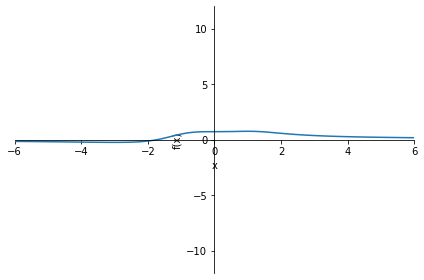

1

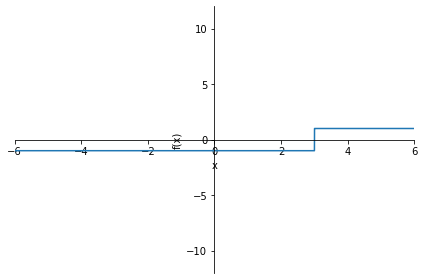

-1

## Exercise 2

Knowing that $f(x)=\frac{3x+5}{x-3}$ and $g(x)=x^2+1$

Calculate the following limits:

$l1 = \lim\limits_{x \to4}~f(x)$

$l2 = \lim\limits_{x \to4}~g(x)$

$lsum = \lim\limits_{x \to4}~(f(x)+g(x))$

$lrest = \lim\limits_{x \to4}~(f(x)-g(x))$

$lprod = \lim\limits_{x \to4}~(f(x)*g(x))$

$ldiv = \lim\limits_{x \to4}~\frac{f(x)}{g(x)}$

In [41]:
#l1


17

In [42]:
#l2


17

In [43]:
#lsum


34

In [44]:
#lrest


0

In [45]:
#lprod


289

In [46]:
#ldiv


1

## Exercise 3

Calculate the iterated limits of the following functions:

$\lim\limits_{(x,y) \to (4,3)}~\frac{x^2-1}{3x+y}$

$\lim\limits_{(x,y) \to (2,2)}~\frac{x+3}{xy-4}$

In [47]:
# Primera
#lxy


1

In [48]:
#lyx


1

In [49]:
# Segunda
#lxy

oo

In [50]:
#lyx


oo

## Exercise 4

Calculate the iterated limits of the following function and draw the function


$\lim\limits_{(x,y) \to (0,0)}~\frac{xy}{x^2+y^2}$

In [51]:
#lxy


0

In [52]:
#lyx


0

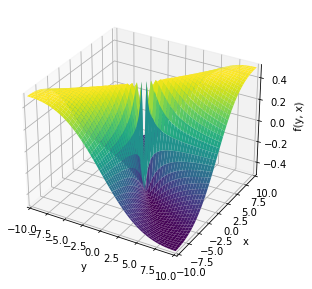

In [53]:
#gráfica


## Exercise 5

Get the derivative of the function $sin(x)$ by referring to the definition of the derivative and using the limit command

cos(x)

## Exercise 6

Get the derivative of the matrix:

$\begin{bmatrix}cos(4x) & 3x\\x & sen(5x)\end{bmatrix}$

Check information about matrices at [https://docs.sympy.org/latest/modules/matrices/matrices.html#creating-matrices]

Matrix([
[-4*sin(4*x),          3],
[          1, 5*cos(5*x)]])

## Exercise 7

Calculate the first partial derivative with respect to x of the following expressions:

$tan(x + y)$

$ay + bx + cz$

$x^{0.5} − 3y$

tan(x + y)**2 + 1

b

0.5/x**0.5

## Exercise 8

Analyze the following expressions. Create a function that when entering the expressions creates a graph with the function along with its
roots, asymptotes and critical points.

$\frac{2x}{x^2+1}$

$\frac{log(x)}{x}$

$\frac{x+1}{\sqrt{x-1}-5}$

$\frac{x^3}{(x-1)^2}-8$

Original:

2*x/(x**2 + 1)

Asíntotas horizontales: 0
Asíntotas verticales: []
Derivada:

-4*x**2/(x**2 + 1)**2 + 2/(x**2 + 1)

Puntos críticos: [-1, 1]
Hay un mínimo en (-1,-1)
Hay un mínimo en (1,1)


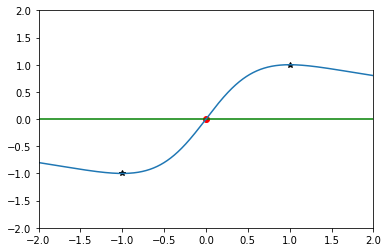

Original:

log(x)/x

Asíntotas horizontales: 0
Asíntotas verticales: [0]
Derivada:

-log(x)/x**2 + x**(-2)

Puntos críticos: [E]
Hay un mínimo en (E,exp(-1))


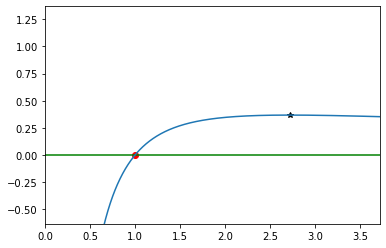

Original:

(x + 1)/(sqrt(x - 1) - 5)

Asíntotas horizontales: oo
Asíntotas verticales: [26]
Derivada:

1/(sqrt(x - 1) - 5) - (x + 1)/(2*sqrt(x - 1)*(sqrt(x - 1) - 5)**2)

Puntos críticos: [30*sqrt(3) + 53]
Hay un máximo en (30*sqrt(3) + 53,(30*sqrt(3) + 54)/(-5 + sqrt(30*sqrt(3) + 52)))


<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in sqrt
  return (x + 1)/(sqrt(x - 1) - 5)


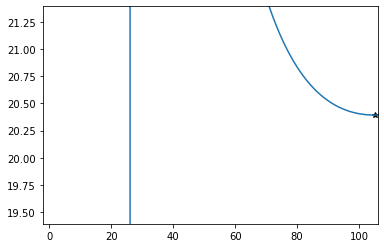

Original:

x**3/(x - 1)**2 - 8

Asíntotas horizontales: oo
Asíntotas verticales: [1]
Derivada:

-2*x**3/(x - 1)**3 + 3*x**2/(x - 1)**2

Puntos críticos: [0, 3]
Hay un mínimo en (0,-8)
Hay un máximo en (3,-5/4)


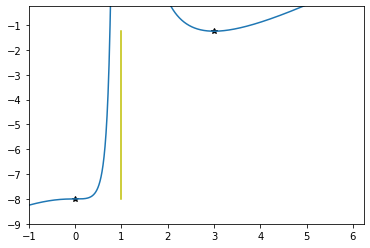

## Exercise 9

A window is constructed in its upper part with a semicircle and in its lower part with a rectangle. If there are 12m of materials, what will be the dimensions of the window so that the greatest amount of light can enter?

nuevo_y:


-pi*x/2 - x + 6

Puntos criticos: [12/(pi + 4)]
Anchura optima: 24/(pi + 4)
Altura optima: -6*pi/(pi + 4) - 12/(pi + 4) + 6


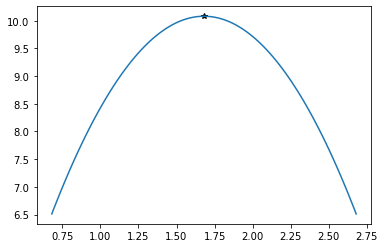

## Exercise 10

Determine the points on $y = x^2 + 1$ closest to $(0, 2)$

Puntos críticos: [0, -sqrt(2)/2, sqrt(2)/2]


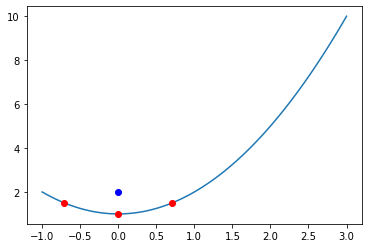

## Exercise 11

Calculate the Jacobian matrix of $g(x, y, z) = (e^x, cos(y), sen(z))$

Check how to calculate the Jacobian at [https://docs.sympy.org/latest/modules/matrices/matrices.html]

Matrix([
[exp(x),       0,      0],
[     0, -sin(y),      0],
[     0,       0, cos(z)]])

## Exercise 12

Calculates the Hessian matrix of the function $f (x, y) = xy + 2zx$

Check how to calculate the Hessian at [https://docs.sympy.org/latest/modules/matrices/matrices.html]

Matrix([
[0, 1, 2],
[1, 0, 0],
[2, 0, 0]])

## Exercise 11

Represent the following functions and calculate their gradient

$f (x, y) = x^2y^3$

$g(x, y) = xe^{−x^2−y^2}$

Remember that the **gradient** is the vector formed by the partial derivatives of a **scalar** function.

The **Jacobian** matrix is ​​the matrix formed by the partial derivatives of a vector function. Their vectors are the **gradients** of the respective components of the function.

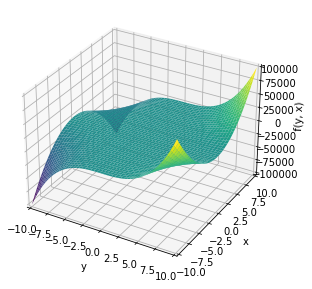

Matrix([[2*x*y**3, 3*x**2*y**2]])

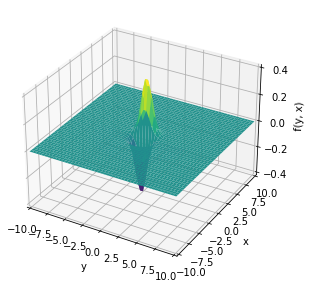

Matrix([[-2*x**2*exp(-x**2 - y**2) + exp(-x**2 - y**2), -2*x*y*exp(-x**2 - y**2)]])